In [1]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

preciton is :  80.0 %
vector num is :  [ 7 27 24]


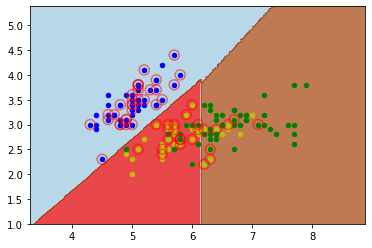

In [2]:
def plot_point2(dataArr, labelArr, Support_vector_index):
    for i in range(np.shape(dataArr)[0]):
        if labelArr[i] == 0:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='b', s=20)
        elif labelArr[i] == 1:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='y', s=20)
        else:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='g', s=20)
    
    for j in Support_vector_index:
        plt.scatter(dataArr[j][0], dataArr[j][1], s=100, c='',alpha=0.5, linewidth=1.5, edgecolor='red')
    plt.show()
 
if __name__ == "__main__":
    iris = load_iris()
    x, y = iris.data, iris.target
    x = x[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    clf = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
    clf.fit(X_train, y_train)
 
    predict_list = clf.predict(X_test)
 
    precition = clf.score(X_test, y_test)
    print("preciton is : ", precition * 100, "%")
 
    n_Support_vector = clf.n_support_
    print("vector num is : ", n_Support_vector)
    Support_vector_index = clf.support_
 
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plot_point2(x, y, Support_vector_index)